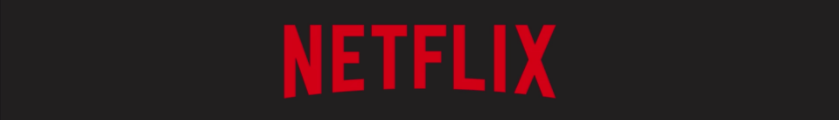

# Análise de dados da plataforma Netflix

<blockquote> Este é um projeto de portfólio, foi desenvolvido tanto para validar meu conhecimento, quanto para que recrutadores vejam as habilidades em prática. </blockquote>

<blockquote> <b> Fonte de dados: </b> <a href= "https://www.kaggle.com/datasets/shivamb/netflix-shows"> www.kaggle.com/datasets/shivamb/netflix-shows  </a> </blockquote>

In [1]:
import pandas as pd
import numpy as np
import tratamento_ausentes as ta

In [2]:
# ta é um módulo extraído de um dos cursos do qual realizei onde há funções pré definidas para tratamento de valores ausentes.

In [3]:
# lendo os dados do arquivo de texto csv

df = pd.read_csv('netflix_data.csv', sep = ',')

## Análise Exploratória dos Dados

In [4]:
# Exibindo informações das variáveis do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Exibindo uma amostra dos dados
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Exibindo estatísticas das variáveis categóricas
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
# exibindo estatísticas das variáveis numéricas
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Removendo Coluna ID

In [8]:
# Removendo coluna de identificação ID, pois não será utilizado para a análise

df = df.drop(['show_id'], axis = 1)

In [9]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [10]:
# Exibindo total de linhas / colunas do dataset

df.shape

(8807, 11)

## Tratamento de Valores Ausentes

In [11]:
#Verificando valores NaN no dataset

df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# Exibindo tabela de valores ausentes por coluna

ta.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 11 colunas.
Encontrado: 6 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
director,2634,29.91,object
country,831,9.44,object
cast,825,9.37,object
date_added,10,0.11,object
rating,4,0.05,object
duration,3,0.03,object


In [13]:
# Preenche valores NA coluna por coluna

ta.fix_missing_value(df,'director', "NA")

2634 valores ausentes na coluna director foram substituídos por NA.


0       Kirsten Johnson
1                    NA
2       Julien Leclercq
3                    NA
4                    NA
             ...       
8802      David Fincher
8803                 NA
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [14]:
ta.fix_missing_value(df,'country', "NA")

831 valores ausentes na coluna country foram substituídos por NA.


0       United States
1        South Africa
2                  NA
3                  NA
4               India
            ...      
8802    United States
8803               NA
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [15]:
ta.fix_missing_value(df,'cast', "NA")

825 valores ausentes na coluna cast foram substituídos por NA.


0                                                      NA
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                      NA
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                   NA
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [16]:
ta.fix_missing_value(df,'date_added', "NA")

10 valores ausentes na coluna date_added foram substituídos por NA.


0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [17]:
ta.fix_missing_value(df,'rating', "NA")

4 valores ausentes na coluna rating foram substituídos por NA.


0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [18]:
ta.fix_missing_value(df,'duration', "NA")

3 valores ausentes na coluna duration foram substituídos por NA.


0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [19]:
ta.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 11 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [20]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NA,NA,NA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Alterando tipo de dado

In [22]:
df['type'] = df['type'].astype("string")

In [23]:
df['title'] = df['title'].astype("string")

In [24]:
df['director'] = df['director'].astype("string")

In [25]:
df['cast'] = df['cast'].astype("string")

In [26]:
df['country'] = df['country'].astype("string")

In [27]:
df['date_added'] = df['date_added'].astype("string")

In [28]:
df['release_year'] = df['release_year'].astype("string")

In [29]:
df['rating'] = df['rating'].astype("string")

In [30]:
df['duration'] = df['duration'].astype("string")

In [31]:
df['listed_in'] = df['listed_in'].astype("string")

In [32]:
df['description'] = df['description'].astype("string")

In [33]:
df.dtypes

type            string
title           string
director        string
cast            string
country         string
date_added      string
release_year    string
rating          string
duration        string
listed_in       string
description     string
dtype: object

## Limpeza e Formatação dos dados

<blockquote> O Objetivo é dividir a coluna date_add em 3, sendo Mês, Dia e Ano </blockquote>

In [34]:
#Separando a coluna date_add em um novo dataframe

new_df = pd.DataFrame(df['date_added'])

In [35]:
new_df

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
8802,"November 20, 2019"
8803,"July 1, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [36]:
# Verificando linha de índice 8684 do dataframe

new_df.loc[(new_df.index == 8684)]

,date_added
8684,"August 1, 2017"


In [37]:
# Removendo os espaços em branco da coluna date_added que estejam à esquerda. (lstrip = left strip)
# Tive de adicionar essa linha de código pois me deparei com um espaço em branco no início da string de data
# que comprometeu o resultado durante o projeto.

new_df = new_df['date_added'].str.lstrip()

In [38]:
# Substituindo valor em branco por vírgula

new_df = new_df.str.replace(' ',',')

In [39]:
new_df.loc[(new_df.index == 8684)]

8684    August,1,,2017
Name: date_added, dtype: string

In [40]:
type(new_df)

pandas.core.series.Series

In [41]:
new_df = new_df.str.replace(',,',',')

In [42]:
new_df.loc[(new_df.index == 8684)]

8684    August,1,2017
Name: date_added, dtype: string

In [43]:
new_df = new_df.str.replace(',','', 0)

In [44]:
new_df.loc[(new_df.index == 8684)]

8684    August,1,2017
Name: date_added, dtype: string

In [45]:
new_df

0       September,25,2021
1       September,24,2021
2       September,24,2021
3       September,24,2021
4       September,24,2021
              ...        
8802     November,20,2019
8803          July,1,2019
8804      November,1,2019
8805      January,11,2020
8806         March,2,2019
Name: date_added, Length: 8807, dtype: string

In [46]:
new_df.to_frame()

,date_added
0,"September,25,2021"
1,"September,24,2021"
2,"September,24,2021"
3,"September,24,2021"
4,"September,24,2021"
...,...
8802,"November,20,2019"
8803,"July,1,2019"
8804,"November,1,2019"
8805,"January,11,2020"


In [47]:
new_df = pd.DataFrame(new_df)

In [48]:
type(new_df)

pandas.core.frame.DataFrame

In [49]:
new_df

,date_added
0,"September,25,2021"
1,"September,24,2021"
2,"September,24,2021"
3,"September,24,2021"
4,"September,24,2021"
...,...
8802,"November,20,2019"
8803,"July,1,2019"
8804,"November,1,2019"
8805,"January,11,2020"


In [50]:
# Expandindo a coluna em novas colunas utilizando o separador ","

new_df = new_df['date_added'].str.split(',', expand = True)

In [51]:
new_df

,0,1,2
0,September,25,2021
1,September,24,2021
2,September,24,2021
3,September,24,2021
4,September,24,2021
...,...,...,...
8802,November,20,2019
8803,July,1,2019
8804,November,1,2019
8805,January,11,2020


In [52]:
# Renomeando as colunas 0 1 e 2

new_df = new_df.rename(columns={0:'month_added',1:'day_added',2:'year_added'})

In [53]:
new_df

,month_added,day_added,year_added
0,September,25,2021
1,September,24,2021
2,September,24,2021
3,September,24,2021
4,September,24,2021
...,...,...,...
8802,November,20,2019
8803,July,1,2019
8804,November,1,2019
8805,January,11,2020


### Adicionando as 3 novas colunas ao dataset

In [54]:
df = df.merge(new_df, left_index = True, right_index = True, sort = False)

In [55]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021
1,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24,2021
3,TV Show,Jailbirds New Orleans,NA,NA,NA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021
4,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021


In [56]:
# Excluindo a coluna que foi dividida
df.drop(['date_added'], axis = 1, inplace = True)

In [57]:
# Salvando o dataframe para continuar o projeto posteriormente.
df.to_csv('netflix_df.csv', index = False)